In [1]:
from pathlib import Path

import ants
import corr
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
pth = Path("../../data/low_movement/Experiment-746czi")


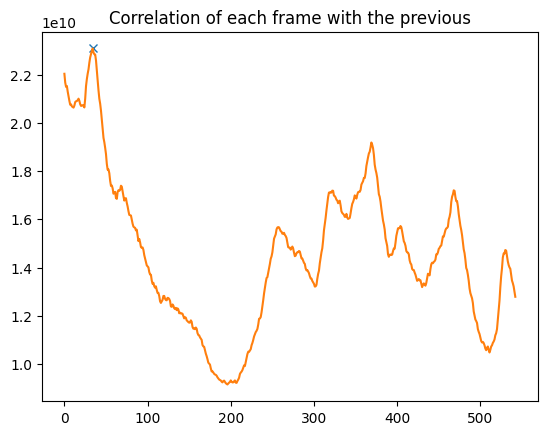

template_index=34


In [3]:
pattern = r"frame_*.tif"
frame_paths = list(pth.glob(pattern))
if not frame_paths:
    error_msg = f"No files found matching {pattern}"
    raise FileNotFoundError(error_msg)
frame_paths = [x.as_posix() for x in frame_paths]
frame_paths.sort()
frames = [np.array(Image.open(path)).astype(np.float32) for path in frame_paths]
frames = np.asarray(frames)
template_index = corr.find_highest_correlation(frames, plot=True)
template = frames[template_index]
print(f"{template_index=}")


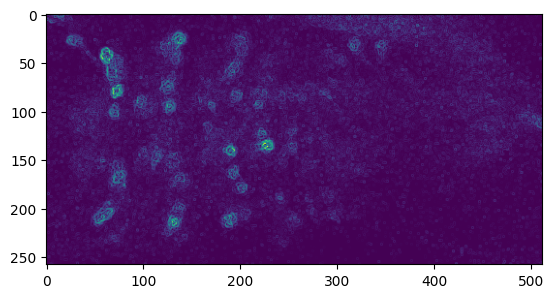

In [4]:
magnitude = corr.get_magnitude(template)
plt.imshow(magnitude)

In [5]:
ants_corrected = corr.ants_reg(frames, template_index)

100%|██████████| 544/544 [10:58<00:00,  1.21s/it]


In [6]:
save_path = Path("../../data/cache/")
for i, arr in enumerate(ants_corrected):
    image = Image.fromarray(arr)
    image.save((save_path / f"ants_{i}.tiff").as_posix())

In [7]:
save = False
if save:
    ants_paths = list(save_path.glob("../../data/cache/ants*.tiff"))
    ants_paths = [x.as_posix() for x in ants_paths]
    ants_paths.sort()
    ants_corrected = [ants.image_read(ants_path) for ants_path in ants_paths]

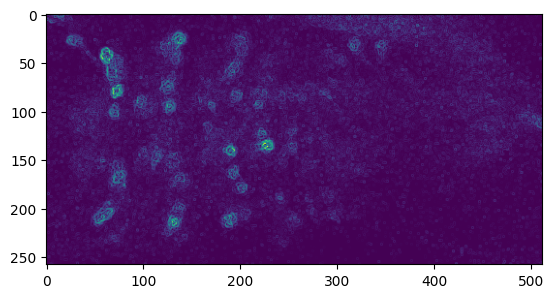

In [8]:
magnitude_template = corr.get_magnitude(template)
plt.imshow(magnitude_template)

In [9]:
len(ants_corrected)

544

In [10]:
mean_ssim, mean_gradient_ssim = corr.evaluate(ants_corrected, template)

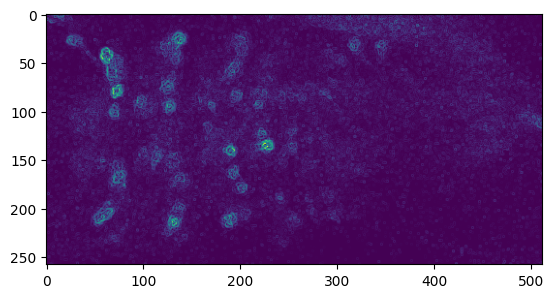

In [11]:
magnitude_template = corr.get_magnitude(template)
plt.imshow(magnitude_template)

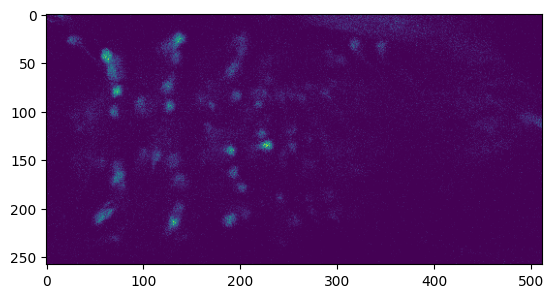

In [12]:
plt.imshow(template)

In [13]:
np.std(mean_ssim)

0.060702015561934185

In [14]:
np.std(mean_gradient_ssim)

0.05636115723031227

In [15]:
np.median(mean_ssim)

0.6125473376631325

In [16]:
np.median(mean_gradient_ssim)

0.44407022921528516